In [1]:
import pandas as pd

In [2]:
smaller_cedars = pd.read_csv('data/claims_selected_programs_2016_2020.csv')

C:\Users\audre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,27,33,37,38,40,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
chris_data = pd.read_csv('data/specific_cedars_programs.csv')

In [4]:
chris_data['PrgID'].value_counts().sum() == chris_data['PrgID'].value_counts().size

True

**PrgID IN chris_data ARE UNIQUE but in smaller_cedars ARE NOT**

In [5]:
smaller_cedars['Program ID'].value_counts().sum() == smaller_cedars['Program ID'].value_counts().size

False

In [6]:
smaller_cedars['Program ID'].value_counts()

PGE21015          112193
SCE-13-SW-002F    103803
SCE-13-SW-002D     90222
PGE21012           63163
SDGE3224           57075
                   ...  
SDGE3309               1
SCE-13-LCE             1
SCE-13-L-003H          1
PGE210114              1
PGE_3P_Com             1
Name: Program ID, Length: 227, dtype: int64

In [7]:
chris_data['Selected'].value_counts(dropna = False)

NaN    485
x      330
Name: Selected, dtype: int64

**not all programs 'Selected' in chris_data will make it through the merge**

In [8]:
smaller_cedars['Primary Sector'] = smaller_cedars['Primary Sector'].astype('category')

In [9]:
new = smaller_cedars.merge( chris_data, 
                     left_on = 'Program ID', right_on = 'PrgID',
                    how = 'left')

In [10]:
new['Program ID'].value_counts()

PGE21015          112193
SCE-13-SW-002F    103803
SCE-13-SW-002D     90222
PGE21012           63163
SDGE3224           57075
                   ...  
SDGE3309               1
SCE-13-LCE             1
SCE-13-L-003H          1
PGE210114              1
PGE_3P_Com             1
Name: Program ID, Length: 227, dtype: int64

In [11]:
new['Selected'].value_counts(dropna = False)

x    870428
Name: Selected, dtype: int64

In [12]:
new['Grouping'].value_counts(dropna = False)

NaN                                        616330
Local Government (Counties)                202436
Local Government ()                         42885
Education ()                                 3857
Local Government (Cities)                    2537
Education (K-12)                              928
Education (Higher Education CCC)              510
State ()                                      504
Education (Higher Education UC/CSU)           317
State (Correctional Facilities)                65
State (Correctional Facilities)                16
Education (Higher Education CSU)               16
Local Government                               16
Local Gov't()                                   5
Education (Higher Education UC/CSU/CCC)         5
Federal ()                                      1
Name: Grouping, dtype: int64

In [13]:
new['County'].value_counts(dropna = False)

NaN                                712876
San Mateo                           53981
Kern                                22070
Sonoma                              17113
Fresno                              12146
Santa Clara, Alameda, San Mateo     10618
Marin                                7995
Monterey                             6794
San Luis Obispo                      3797
Solano                               3697
San Francisco                        3607
Redwood                              3435
Mendocino                            2184
Santa Barbara                        2010
Los Angeles                          1608
Orange                               1372
Long Beach                           1174
Madera                                941
Napa                                  898
Riverside                             659
Los Angeles                           422
San Bernardino                        404
Ventura                               137
Yolo                              

HOW DID MEAS DO THIS??? How did she automate this b/c there's no way that's by hand.....maybe I'm trippin but I thought chris's data was only like 40 rows....gonna just trust this and ask later once I'm done

**Budget Comparison**

In [14]:
relevant = new[['Program ID', 'Claim ID', 'Grouping', 'County', 'Budget']]

In [15]:
relevant.head()

,Program ID,Claim ID,Grouping,County,Budget
0,BAYREN06,BAY-2019_COM_19Q1,NaN,NaN,352223.115500
1,BAYREN06,BAY-2020_COM_Q2,NaN,NaN,287466.113500
2,BAYREN06,BAY-2020_COM_Q1,NaN,NaN,287466.113500
3,BAYREN06,BAY-2019_Com_Q2,NaN,NaN,352223.115500
4,LCE-COM-001,LCE-2020-COM-CLAIM-1113,NaN,NaN,200.320838


In [16]:
relevant = relevant.fillna(0)

In [17]:
relevant['County'].value_counts(dropna = False)

0                                  712876
San Mateo                           53981
Kern                                22070
Sonoma                              17113
Fresno                              12146
Santa Clara, Alameda, San Mateo     10618
Marin                                7995
Monterey                             6794
San Luis Obispo                      3797
Solano                               3697
San Francisco                        3607
Redwood                              3435
Mendocino                            2184
Santa Barbara                        2010
Los Angeles                          1608
Orange                               1372
Long Beach                           1174
Madera                                941
Napa                                  898
Riverside                             659
Los Angeles                           422
San Bernardino                        404
Ventura                               137
Yolo                              

In [18]:
relevant['Grouping'].value_counts()

0                                          616330
Local Government (Counties)                202436
Local Government ()                         42885
Education ()                                 3857
Local Government (Cities)                    2537
Education (K-12)                              928
Education (Higher Education CCC)              510
State ()                                      504
Education (Higher Education UC/CSU)           317
State (Correctional Facilities)                65
State (Correctional Facilities)                16
Education (Higher Education CSU)               16
Local Government                               16
Local Gov't()                                   5
Education (Higher Education UC/CSU/CCC)         5
Federal ()                                      1
Name: Grouping, dtype: int64

In [19]:
counties = relevant[relevant['County'] != 0 ]

nocounties = relevant[relevant['County'] == 0]

In [20]:
counties.shape

(157552, 5)

In [21]:
nocounties.shape

(712876, 5)

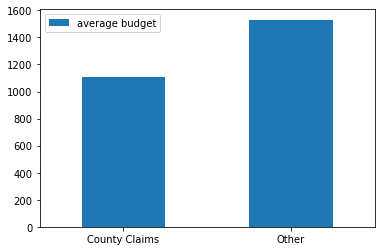

In [22]:
average_budget = [counties['Budget'].mean(), nocounties['Budget'].mean()]
total_budget = [counties['Budget'].sum(), nocounties['Budget'].sum()] 
index1 = ['County Claims', 'Other']
index2 = ['County Programs', 'Other']
df1 = pd.DataFrame ({'average budget': average_budget}, index=index1)

ab = df1.plot.bar(rot=0)


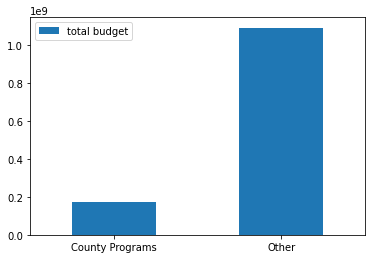

In [23]:
df2 = pd.DataFrame ({'total budget': total_budget}, index=index2)

tb = df2.plot.bar(rot=0)

In [24]:
fig1 = ab.get_figure()
fig1.savefig('average_claims_budget')

In [25]:
fig2 = tb.get_figure()
fig2.savefig('total_budget')

aggregate by 'Program ID' and 'Year'; so many columns because each program has numerous claims

What happened to the 103 programs from chris's data that didn't make it into smaller_cedars?

In [26]:
otro = chris_data.merge( smaller_cedars, 
                     left_on = 'PrgID', right_on = 'Program ID',
                    how = 'left')

otro.head()

,PA_x,PrgID,ProgramName,Grouping,County,Selected,PrimarySector,Sector,BP Sector,ProgramImplementer,...,First Year Net Elec NOx,First Year Net Gas NOx,Lifecycle Gross Elec NOx,Lifecycle Gross Gas NOx,Lifecycle Net Elec NOx,Lifecycle Net Gas NOx,First Year Gross PM10,First Year Net PM10,Lifecycle Gross PM10,Lifecycle Net PM10
0,BAY,BAYREN01,Single Family,NaN,NaN,NaN,Residential,Residential (Res),Residential: 1.000000,REN/CCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAY,BAYREN02,Multi Family,NaN,NaN,NaN,Residential,Residential (Res),Residential: 1.000000,REN/CCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAY,BAYREN02-A,BAMBE Electrification,NaN,NaN,NaN,Residential,Residential (Res),Residential: 1.000000,REN/CCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAY,BAYREN02-B,BAMBE Electrification,NaN,NaN,NaN,Residential,Residential (Res),Residential: 1.000000,REN/CCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAY,BAYREN03,Codes and Standards Program,NaN,NaN,NaN,Cross-Cutting,Residential (Res),Codes and Standards: 1.000000,REN/CCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
otro.shape

(871016, 181)

In [28]:
new.shape

(870428, 181)

In [29]:
all_prgid = otro[['PrgID', 'Year', 'Selected']]
all_prgid.head(10)

MemoryError: Unable to allocate 478. MiB for an array with shape (72, 871016) and data type object

In [ ]:
all_prgid['Selected'].value_counts(dropna = False)

In [ ]:
all_prgid['PrgID'].unique

In [ ]:
new['Selected'].value_counts(dropna = False)

In [ ]:
groups = all_prgid.groupby('PrgID')

In [ ]:
prgid = groups.first()

In [ ]:
type(prgid)

In [ ]:
prgid.head()

In [ ]:
prgid.value_counts().sum()

In [ ]:
newgroup = new.groupby('PrgID').first()

In [ ]:
newgroup.index

**Relevant Claims Data** --> By County, # of EE programs, program's budget,  EE program energy savings in kwh

In [ ]:
neww = new.copy()

In [ ]:
forregression = neww[['County', 'Program ID', 'Budget','First Year Gross kWh',
 'First Year Gross Therm',
 'First Year Net kWh',
 'First Year Net Therm']]

In [ ]:
forregression.head()

In [ ]:
forregression['County'].value_counts()

In [ ]:
cc = forregression.groupby([neww['County']], dropna = False).size() #total claims per county

In [ ]:
cc.head()

In [ ]:
cp = forregression.groupby([neww['County'], neww['Program ID']], dropna = False).size().index.tolist()

In [ ]:
cp

In [ ]:
type(cp[0])
    

In [ ]:
a,b = [list(c) for c in zip(*cp)]

In [ ]:
ccp = pd.Series(a) # county count programs

In [ ]:
county_programs = ccp.value_counts(dropna = False) #total programs per county

In [ ]:
cb = forregression.groupby('County', dropna = False)

In [ ]:
cb.sum() #budget and savings by county but some doubles


In [ ]:

def nodoubles(x):
    l=[]
    for e in x.index:
        if e not in l:
            l.append(e)
    return l

In [ ]:
nodoubles(cc)